In [21]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


In [5]:
# source: https://data.world/datadavis/nba-salaries
players_df = pd.read_csv('Resources/players.csv')
salaries_df = pd.read_csv('Resources/salaries_1985to2018.csv')
print(len(players_df))
players_df = players_df.rename(columns={"_id": "player_id"})
players_df.head()

4685


,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [6]:
salaries_df
# players_df.merge(salaries_df, right_on='player_id')


career_salary_list = []
for player in salaries_df['player_id'].unique():
    this_player = salaries_df.loc[salaries_df["player_id"] == player, :]
    career_earnings = this_player['salary'].sum()
    player_salary_dict = {}
    player_salary_dict['player_id'] = player
    player_salary_dict['career_earnings'] = career_earnings
    career_salary_list.append(player_salary_dict)
    
   

nba_salary_df = pd.DataFrame(data=career_salary_list)

print(len(nba_salary_df))    
nba_salary_df.head()

2408


,player_id,career_earnings
0,abdelal01,2844000
1,abdulka01,8560000
2,abdulma02,19849500
3,abdulta01,37982800
4,abdursh01,95866000


In [7]:
nba_df = pd.merge(players_df, nba_salary_df, on='player_id')
# nba_df["career_earnings"] = nba_df["career_earnings"].map("${:,}".format)
# nba_df = nba_df['career_WS'].astype('float64').dtypes
nba_df = nba_df.astype({'career_WS': 'float64', 'career_earnings': 'float64', 'draft_year': 'float64'})
nba_df.dtypes


player_id           object
birthDate           object
birthPlace          object
career_AST         float64
career_FG%          object
career_FG3%         object
career_FT%          object
career_G             int64
career_PER          object
career_PTS         float64
career_TRB          object
career_WS          float64
career_eFG%         object
college             object
draft_pick          object
draft_round         object
draft_team          object
draft_year         float64
height              object
highSchool          object
name                object
position            object
shoots              object
weight              object
career_earnings    float64
dtype: object

In [8]:

post_merger = pre_merger = nba_df.loc[nba_df["draft_year"] >= 1976, :]
eighties = post_merger.loc[post_merger["draft_year"] < 1990, :]
not_eighties = post_merger.loc[post_merger["draft_year"] >= 1990, :]
nineties = not_eighties.loc[not_eighties["draft_year"] < 2000, :]
not_nineties = not_eighties.loc[not_eighties["draft_year"] >= 2000, :]
aughts = not_nineties.loc[not_nineties["draft_year"] < 2010, :]
tens = not_nineties.loc[not_nineties["draft_year"] >= 2010, :]
pre_merger = nba_df.loc[nba_df["draft_year"] < 1976, :]
aughts.head()

,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,career_earnings
6,ackeral01,"January 21, 1983","Compton, California",0.5,37.0,32.0,50.0,30,8.5,2.7,...,2nd round,Detroit Pistons,2005.0,6-5,"Eisenhower in Rialto, California",Alex Acker,Shooting Guard,Right,185lb,1949488.0
10,adamsha01,"June 20, 1984","Inglewood, California",0.2,53.4,0.0,64.3,73,11.8,2.5,...,2nd round,New Jersey Nets,2006.0,6-4,"Westchester in Los Angeles, California",Hassan Adams,Shooting Guard,Right,220lb,709881.0
17,afflaar01,"October 15, 1985","Los Angeles, California",1.8,45.0,38.6,82.5,762,11.9,10.8,...,1st round,Detroit Pistons,2007.0,6-5,"Centennial in Compton, California",Arron Afflalo,Shooting Guard and Small Forward,Right,210lb,58852159.0
18,agerma01,"February 9, 1984","Detroit, Michigan",0.2,33.9,25.0,56.6,82,2.8,2.1,...,1st round,Dallas Mavericks,2006.0,6-5,"Crocket in Detroit, Michigan",Maurice Ager,Shooting Guard,Right,202lb,3006625.0
22,ajincal01,"May 6, 1988","Saint-Etienne, France",0.5,50.3,28.6,79.7,293,14.9,5.3,...,1st round,Charlotte Bobcats,2008.0,7-2,NaN,Alexis Ajinca,Power Forward and Center,Right,248lb,18959122.0


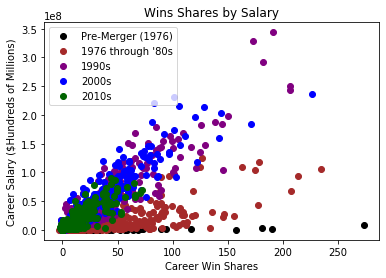

In [9]:
fig, ax = plt.subplots()

ax.plot(pre_merger['career_WS'], pre_merger['career_earnings'], 'o', color='black', label = 'Pre-Merger (1976)')
ax.plot(eighties['career_WS'], eighties['career_earnings'],'o', color='brown', label = "1976 through '80s")
ax.plot(nineties['career_WS'], nineties['career_earnings'],'o', color='purple', label = '1990s')
ax.plot(aughts['career_WS'], aughts['career_earnings'],'o', color='blue', label = '2000s')
ax.plot(tens['career_WS'], tens['career_earnings'],'o', color='darkgreen', label = '2010s')



plt.title("Wins Shares by Salary")
plt.ylabel("Career Salary ($Hundreds of Millions)")
plt.xlabel("Career Win Shares")
plt.legend(loc='best')
plt.savefig('visualizations/Win Shares by Salary - Total')
plt.show()

In [10]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point(pre_merger['career_WS'], pre_merger['career_earnings'], pre_merger['name'], ax)

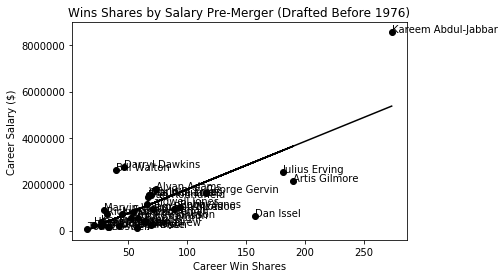

In [11]:
fig, ax = plt.subplots()

ax.plot(pre_merger['career_WS'], pre_merger['career_earnings'], 'o', color='black', linewidth=0, label = 'Pre-Merger (1976)')
label_point(pre_merger['career_WS'], pre_merger['career_earnings'], pre_merger['name'], ax)

(slope, intercept, _, _, _) = linregress(pre_merger['career_WS'], pre_merger['career_earnings'])
fit = slope * pre_merger['career_WS'] + intercept
ax.plot(pre_merger['career_WS'], fit, '-', color='black')

plt.title("Wins Shares by Salary Pre-Merger (Drafted Before 1976)")
plt.ylabel("Career Salary ($)")
plt.xlabel("Career Win Shares")
plt.savefig('visualizations/Win Shares by Salary - Pre-Merger')
plt.show()

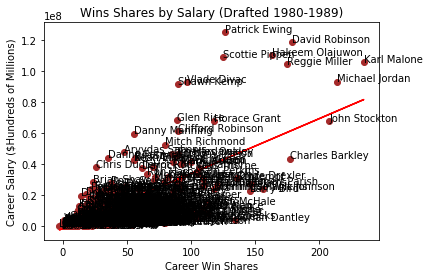

In [12]:
fig, ax = plt.subplots()

ax.plot(eighties['career_WS'], eighties['career_earnings'],'o', color='brown', label = "1976 through '80s")
label_point(eighties['career_WS'], eighties['career_earnings'], eighties['name'], ax)

(slope, intercept, _, _, _) = linregress(eighties['career_WS'], eighties['career_earnings'])
fit = slope * eighties['career_WS'] + intercept
ax.plot(eighties['career_WS'], fit, '-', color='red')

plt.title("Wins Shares by Salary (Drafted 1980-1989)")
plt.ylabel("Career Salary ($Hundreds of Millions)")
plt.xlabel("Career Win Shares")
plt.savefig('visualizations/Win Shares by Salary - Eighties')
plt.show()

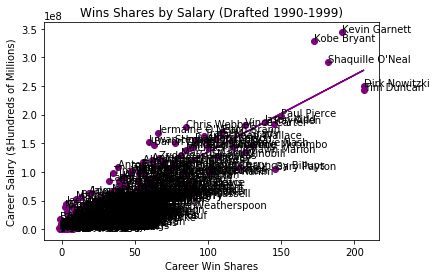

In [13]:
fig, ax = plt.subplots()

ax.plot(nineties['career_WS'], nineties['career_earnings'],'o', color='purple', label = '1990s')
label_point(nineties['career_WS'], nineties['career_earnings'], nineties['name'], ax)

(slope, intercept, _, _, _) = linregress(nineties['career_WS'], nineties['career_earnings'])
fit = slope * nineties['career_WS'] + intercept
ax.plot(nineties['career_WS'], fit, '-', color='purple')

plt.title("Wins Shares by Salary (Drafted 1990-1999)")
plt.ylabel("Career Salary ($Hundreds of Millions)")
plt.xlabel("Career Win Shares")

plt.savefig('visualizations/Win Shares by Salary - Nineties')
plt.show()

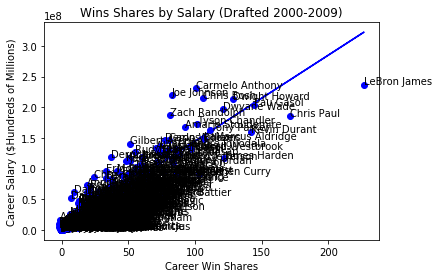

In [14]:
fig, ax = plt.subplots()

ax.plot(aughts['career_WS'], aughts['career_earnings'],'o', color='blue', label = '2000s')
label_point(aughts['career_WS'], aughts['career_earnings'], aughts['name'], ax)

plt.title("Wins Shares by Salary (Drafted 2000-2009)")
plt.ylabel("Career Salary ($Hundreds of Millions)")
plt.xlabel("Career Win Shares")

(slope, intercept, _, _, _) = linregress(aughts['career_WS'], aughts['career_earnings'])
fit = slope * aughts['career_WS'] + intercept
ax.plot(aughts['career_WS'], fit, '-', color='blue')

plt.savefig('visualizations/Win Shares by Salary - Aughts')
plt.show()

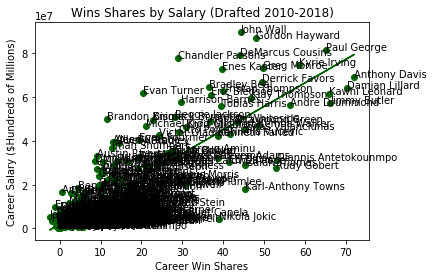

In [15]:
fig, ax = plt.subplots()

ax.plot(tens['career_WS'], tens['career_earnings'],'o', color='darkgreen', label = '2010s')
label_point(tens['career_WS'], tens['career_earnings'], tens['name'], ax)

plt.title("Wins Shares by Salary (Drafted 2010-2018)")
plt.ylabel("Career Salary ($Hundreds of Millions)")
plt.xlabel("Career Win Shares")

(slope, intercept, _, _, _) = linregress(tens['career_WS'], tens['career_earnings'])
fit = slope * tens['career_WS'] + intercept
ax.plot(tens['career_WS'], fit, '-', color='darkgreen')

plt.savefig('visualizations/Win Shares by Salary - Tens')
plt.show()

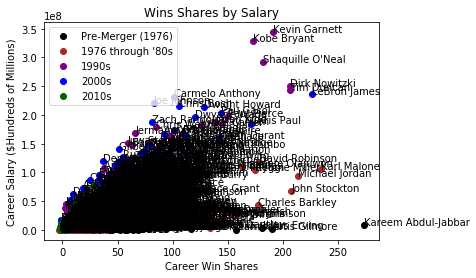

In [16]:
fig, ax = plt.subplots()

ax.plot(pre_merger['career_WS'], pre_merger['career_earnings'], 'o', color='black', label = 'Pre-Merger (1976)')
ax.plot(eighties['career_WS'], eighties['career_earnings'],'o', color='brown', label = "1976 through '80s")
ax.plot(nineties['career_WS'], nineties['career_earnings'],'o', color='purple', label = '1990s')
ax.plot(aughts['career_WS'], aughts['career_earnings'],'o', color='blue', label = '2000s')
ax.plot(tens['career_WS'], tens['career_earnings'],'o', color='darkgreen', label = '2010s')

label_point(pre_merger['career_WS'], pre_merger['career_earnings'], pre_merger['name'], ax)
label_point(eighties['career_WS'], eighties['career_earnings'], eighties['name'], ax)
label_point(nineties['career_WS'], nineties['career_earnings'], nineties['name'], ax)
label_point(aughts['career_WS'], aughts['career_earnings'], aughts['name'], ax)
label_point(tens['career_WS'], tens['career_earnings'], tens['name'], ax)


plt.title("Wins Shares by Salary")
plt.ylabel("Career Salary ($Hundreds of Millions)")
plt.xlabel("Career Win Shares")
plt.legend(loc='best')
plt.savefig('visualizations/Win Shares by Salary - Labelled')
plt.show()